In [1]:
# Import needed libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

In [2]:
#change this with the path to the dataset
dataset_path = "/Users/moji/dataset_repo/ISO-NY" 

# Get the list of files and directories
files_and_dirs = os.listdir(dataset_path)

ds_list = []
# Print each item
for item in files_and_dirs:
    ds_list.append(item)
    print(item)

20240601pal_csv
20240701pal_csv
20220201pal_csv
20220301pal_csv
20230101pal_csv
20220801pal_csv
20220901pal_csv
.DS_Store
20221201pal_csv
20231001pal_csv
20231101pal_csv
20240101pal_csv
20220501pal_csv
20220401pal_csv
20230701pal_csv
20230601pal_csv
20230301pal_csv
20230201pal_csv
long_ds_2324
20240501pal_csv
20240401pal_csv
readme.rtf
20220101pal_csv
20230901pal_csv
20230801pal_csv
20240801pal_csv
20230401pal_csv
20230501pal_csv
20240201pal_csv
20240301pal_csv
20220601pal_csv
20220701pal_csv
20231201pal_csv
20221101pal_csv
20221001pal_csv


In [3]:
directory_path = "/Users/moji/dataset_repo/ISO-NY/long_ds_2324"
all_dataframes = []

# Iterate through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path, parse_dates=['Time Stamp'])
        
        # Append the DataFrame to the list
        all_dataframes.append(df)

# Concatenate all dataframes into a single large dataframe
big_dataset = pd.concat(all_dataframes, axis=0, ignore_index=True)

In [4]:
big_dataset.head()

,Time Stamp,Time Zone,Name,PTID,Load
0,2023-03-23,EDT,CAPITL,61757,1116.3776
1,2023-03-23,EDT,CENTRL,61754,1449.6877
2,2023-03-23,EDT,DUNWOD,61760,503.1355
3,2023-03-23,EDT,GENESE,61753,892.7252
4,2023-03-23,EDT,HUD VL,61758,911.8589


In [5]:
# Extract unique regions from the 'Name' column
regions = big_dataset['Name'].unique()

# Display the regions
print(regions)

['CAPITL' 'CENTRL' 'DUNWOD' 'GENESE' 'HUD VL' 'LONGIL' 'MHK VL' 'MILLWD'
 'N.Y.C.' 'NORTH' 'WEST']


In [6]:
# Create a dictionary to store DataFrames for each region
region_dfs = {region: big_dataset[big_dataset['Name'] == region] for region in regions}

In [20]:
# Example: Access the DataFrame for the 'NYC' region
nyc_df = region_dfs['N.Y.C.']
# Sort the dataframe by the 'date' column
nyc_df = nyc_df.sort_values(by='Time Stamp')
nyc_df = nyc_df.ffill()
# reset the index after sorting
nyc_df = nyc_df.reset_index(drop=True)
nyc_df

,Time Stamp,Time Zone,Name,PTID,Load
0,2023-01-01 00:00:00,EST,N.Y.C.,61761,4697.4350
1,2023-01-01 00:05:00,EST,N.Y.C.,61761,4650.1590
2,2023-01-01 00:10:00,EST,N.Y.C.,61761,4650.5225
3,2023-01-01 00:15:00,EST,N.Y.C.,61761,4635.6167
4,2023-01-01 00:20:00,EST,N.Y.C.,61761,4625.3135
...,...,...,...,...,...
178425,2024-08-30 12:35:00,EDT,N.Y.C.,61761,6543.8740
178426,2024-08-30 12:40:00,EDT,N.Y.C.,61761,6634.0700
178427,2024-08-30 12:45:00,EDT,N.Y.C.,61761,6632.9077
178428,2024-08-30 12:50:00,EDT,N.Y.C.,61761,6610.3223


In [24]:
# Calculate the time difference between consecutive rows
nyc_df['time_diff'] = nyc_df['Time Stamp'].diff()

# Check for gaps larger than 5 minutes
gaps = nyc_df[nyc_df['time_diff'] > pd.Timedelta(minutes=5)]

if gaps.empty:
    print("No gaps found in the data.")
else:
    print(f"Found {len(gaps)} gaps in the data:")
    print(gaps[['Time Stamp', 'time_diff']])

# Optional: To see the distribution of time differences
print(nyc_df['time_diff'].describe())

Found 47 gaps in the data:
                Time Stamp       time_diff
8997   2023-01-31 17:10:03 0 days 00:05:03
9799   2023-02-03 08:20:05 0 days 00:05:05
13166  2023-02-14 11:26:00 0 days 00:06:00
17572  2023-03-01 09:25:05 0 days 00:05:05
20693  2023-03-12 03:00:00 0 days 01:05:00
26083  2023-03-30 04:50:01 0 days 00:05:01
35625  2023-05-01 08:40:01 0 days 00:05:01
48625  2023-06-14 13:55:02 0 days 00:05:02
50632  2023-06-21 11:26:00 0 days 00:06:00
66007  2023-08-13 00:00:00 0 days 00:15:00
67958  2023-08-19 15:50:05 0 days 00:05:05
68526  2023-08-21 13:05:03 0 days 00:05:03
69242  2023-08-23 23:40:00 0 days 00:10:00
73275  2023-09-06 17:35:03 0 days 00:05:03
75095  2023-09-12 21:05:02 0 days 00:05:02
75291  2023-09-13 12:50:04 0 days 00:05:04
80869  2023-10-02 15:39:25 0 days 00:09:25
82866  2023-10-09 10:45:00 0 days 00:15:00
82867  2023-10-09 11:00:00 0 days 00:15:00
82868  2023-10-09 11:15:00 0 days 00:15:00
82869  2023-10-09 11:25:00 0 days 00:10:00
87500  2023-10-25 07:35:03 

In [26]:
nyc_df[66005:66008]

,Time Stamp,Time Zone,Name,PTID,Load,time_diff
66005,2023-08-12 23:40:00,EDT,N.Y.C.,61761,6574.1160,0 days 00:05:00
66006,2023-08-12 23:45:00,EDT,N.Y.C.,61761,6556.7334,0 days 00:05:00
66007,2023-08-13 00:00:00,EDT,N.Y.C.,61761,6477.3105,0 days 00:15:00


In [21]:
nyc_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Time Stamp,178430,2023-10-31 08:56:40.758386944,2023-01-01 00:00:00,2023-05-31 18:16:15,2023-10-31 03:42:30,2024-03-31 15:13:45,2024-08-30 12:55:00,NaN
PTID,178430.0,61761.0,61761.0,61761.0,61761.0,61761.0,61761.0,0.0
Load,178430.0,5655.014029,3682.7292,4810.68875,5490.83595,6167.03645,10429.561,1183.242454


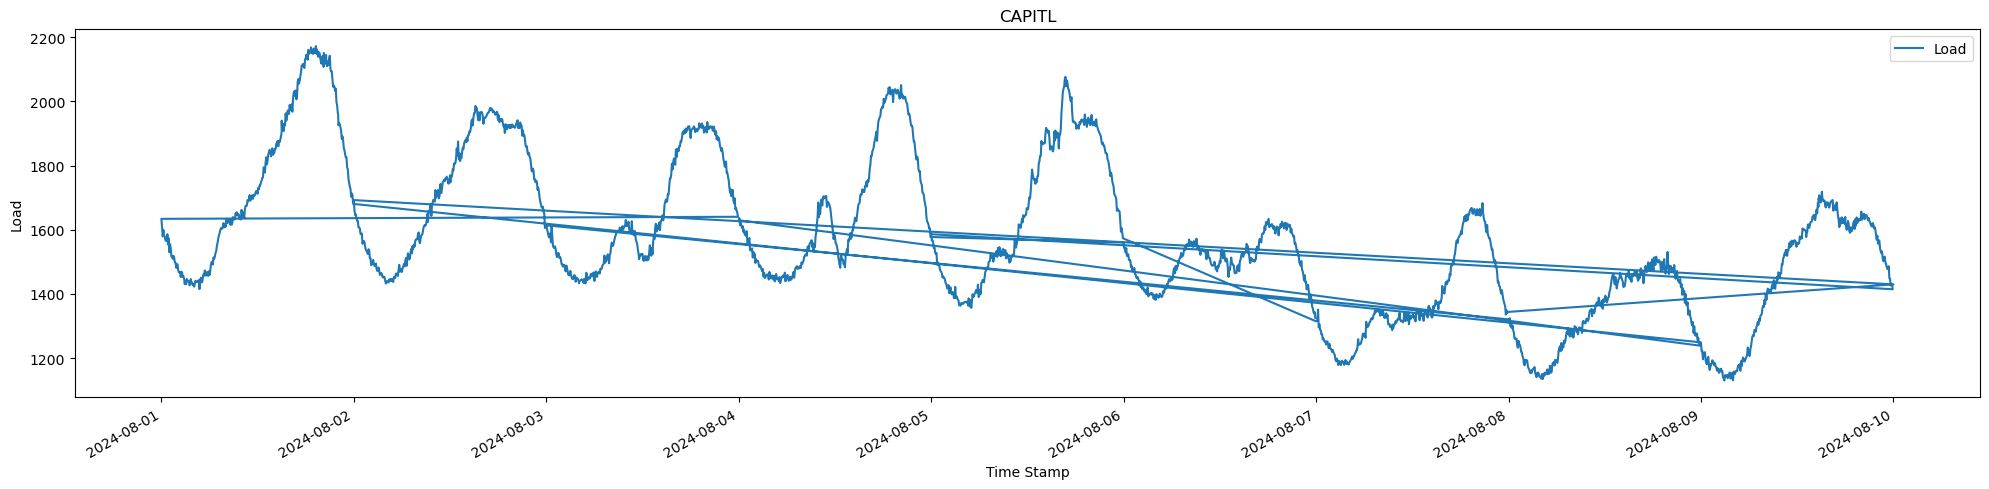

In [23]:
# Number of regions
num_regions = 1
# Define the specific date range you want to plot
start_date = '2024-08-01'  # Replace with your desired start date
end_date = '2024-08-10'    # Replace with your desired end date

# Create subplots
fig, axes = plt.subplots(num_regions, 1, figsize=(20, 5 * num_regions), sharex=True)

# If there's only one region, `axes` won't be an array, so we wrap it in a list
if num_regions == 1:
    axes = [axes]

# Plot each DataFrame on a separate axis
for ax, (region, data) in zip(axes, region_dfs.items()):
    # Filter the DataFrame to only include the specified date range
    filtered_data = data[(data['Time Stamp'] >= start_date) & (data['Time Stamp'] <= end_date)]
        
    filtered_data.plot(x='Time Stamp', y='Load', ax=ax, title=region)
    ax.set_ylabel('Load')

# Set a common label for the x-axis
plt.xlabel('Time Stamp')
plt.tight_layout()
plt.show()

In [7]:
new_path = os.path.join(dataset_path,ds_list[0]) #change this to ds_list[1] for the other file
a = os.listdir(new_path)
a[0]

'20240620pal.csv'

In [8]:
ds_path = os.path.join(new_path,a[0])
ds_path

'/Users/moji/dataset_repo/ISO-NY/20240601pal_csv/20240620pal.csv'

In [9]:
df = pd.read_csv(ds_path, parse_dates=['Time Stamp'])
df

,Time Stamp,Time Zone,Name,PTID,Load
0,2024-06-20 00:00:00,EDT,CAPITL,61757,1800.4473
1,2024-06-20 00:00:00,EDT,CENTRL,61754,2165.7850
2,2024-06-20 00:00:00,EDT,DUNWOD,61760,793.1893
3,2024-06-20 00:00:00,EDT,GENESE,61753,1539.0667
4,2024-06-20 00:00:00,EDT,HUD VL,61758,1364.1179
...,...,...,...,...,...
3251,2024-06-20 23:55:00,EDT,MHK VL,61756,983.3492
3252,2024-06-20 23:55:00,EDT,MILLWD,61759,397.0832
3253,2024-06-20 23:55:00,EDT,N.Y.C.,61761,7202.8280
3254,2024-06-20 23:55:00,EDT,NORTH,61755,659.9377


In [10]:
# Extract unique regions from the 'Name' column
regions = df['Name'].unique()

# Display the regions
print(regions)

['CAPITL' 'CENTRL' 'DUNWOD' 'GENESE' 'HUD VL' 'LONGIL' 'MHK VL' 'MILLWD'
 'N.Y.C.' 'NORTH' 'WEST']


In [13]:
# Create a dictionary to store DataFrames for each region
region_dfs = {region: df[df['Name'] == region] for region in regions}
region_dfs.keys()

dict_keys(['CAPITL', 'CENTRL', 'DUNWOD', 'GENESE', 'HUD VL', 'LONGIL', 'MHK VL', 'MILLWD', 'N.Y.C.', 'NORTH', 'WEST'])

In [14]:
# Example: Access the DataFrame for the 'CAPITL' region
capitl_df = region_dfs['CAPITL']

capitl_df

,Time Stamp,Time Zone,Name,PTID,Load
0,2024-06-20 00:00:00,EDT,CAPITL,61757,1800.4473
11,2024-06-20 00:05:00,EDT,CAPITL,61757,1778.7690
22,2024-06-20 00:10:00,EDT,CAPITL,61757,1698.3510
33,2024-06-20 00:15:00,EDT,CAPITL,61757,1683.1027
44,2024-06-20 00:20:00,EDT,CAPITL,61757,1768.4634
...,...,...,...,...,...
3201,2024-06-20 23:35:00,EDT,CAPITL,61757,1754.4366
3212,2024-06-20 23:40:00,EDT,CAPITL,61757,1758.3104
3223,2024-06-20 23:45:00,EDT,CAPITL,61757,1721.9150
3234,2024-06-20 23:50:00,EDT,CAPITL,61757,1721.3713


In [20]:
name = a[0].split(".")[0]

'20240620pal'

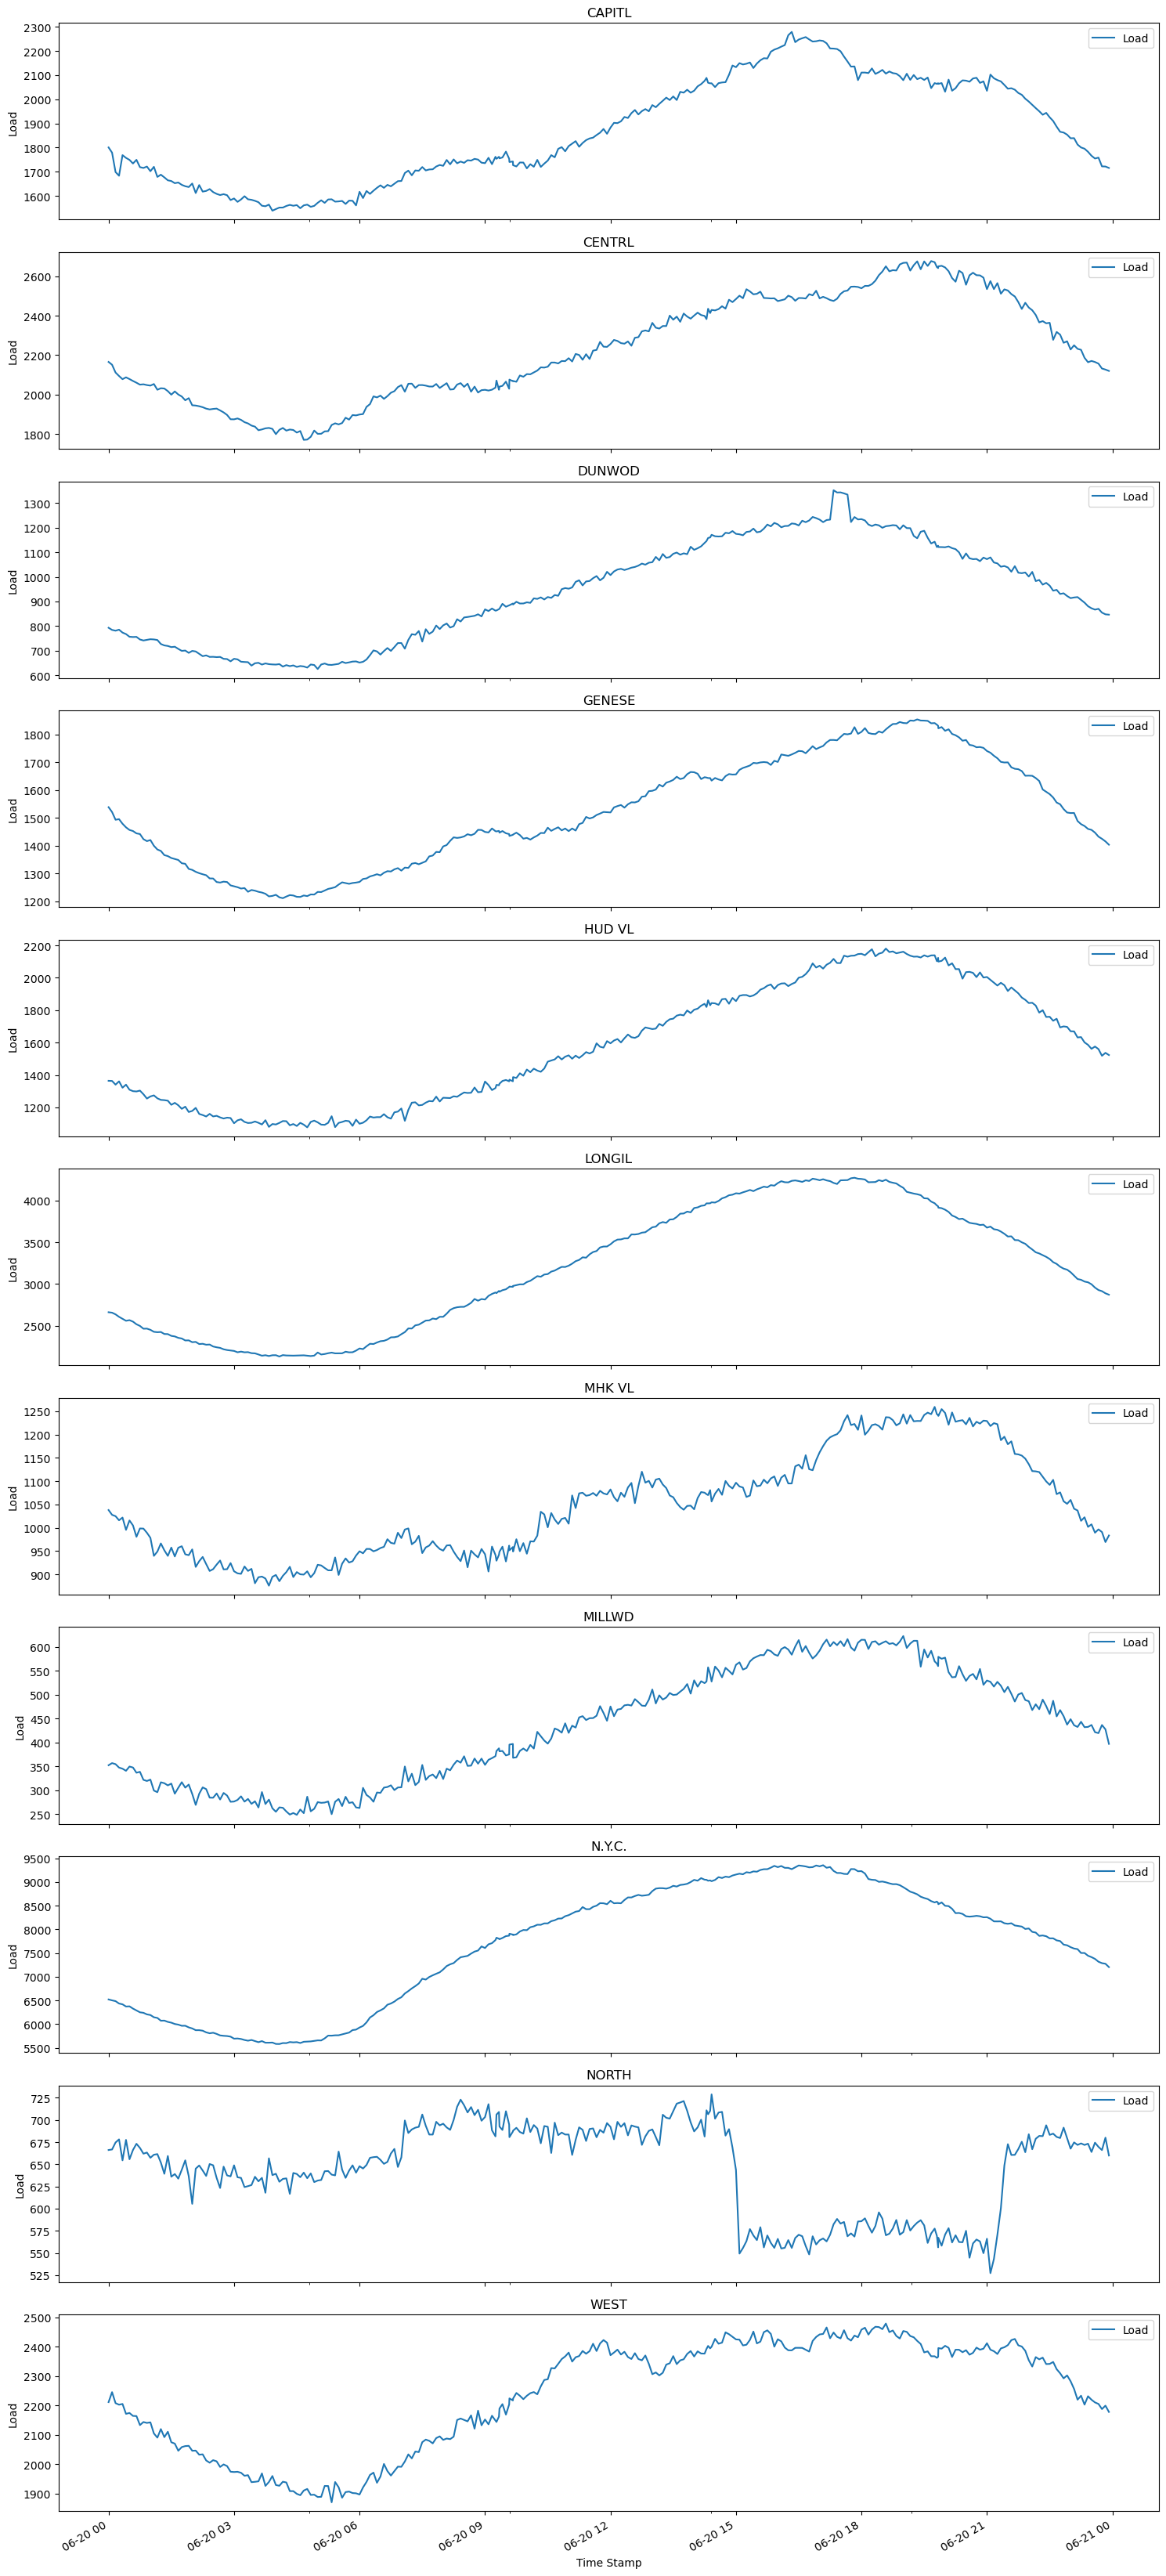

In [25]:
# Number of regions
num_regions = len(region_dfs)

# Create subplots
fig, axes = plt.subplots(num_regions, 1, figsize=(15, 3 * num_regions), sharex=True)

# If there's only one region, `axes` won't be an array, so we wrap it in a list
if num_regions == 1:
    axes = [axes]

# Plot each DataFrame on a separate axis
for ax, (region, data) in zip(axes, region_dfs.items()):
    data.plot(x='Time Stamp', y='Load', ax=ax, title=region)
    ax.set_ylabel('Load')

# Set a common label for the x-axis
plt.xlabel('Time Stamp')
plt.tight_layout()
plt.show()